<a href="https://colab.research.google.com/github/K2FA/PCVK_Genap_2023/blob/main/week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# 2

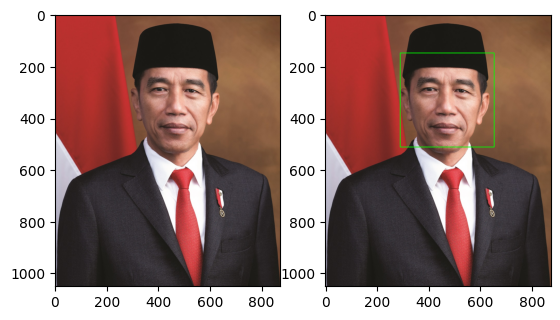

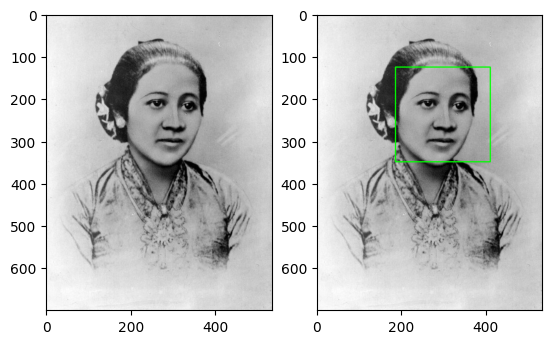

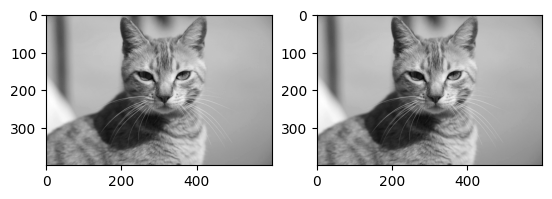

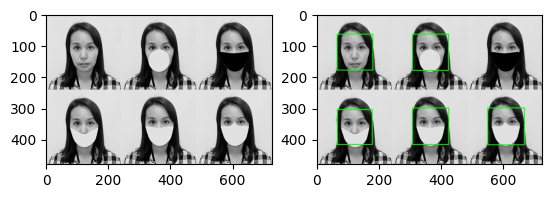

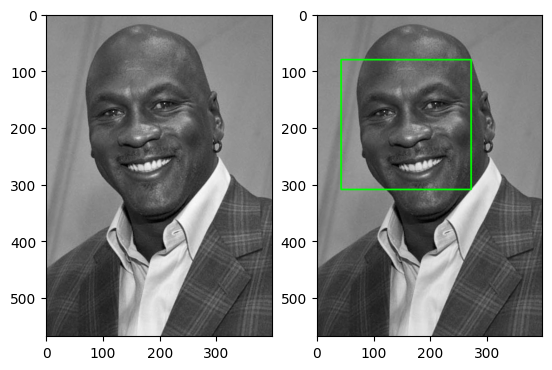

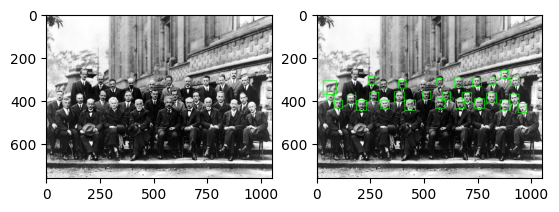

In [3]:
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/12/haarcascade_frontalface_alt.xml')

def cascade(img, gray) :
  faces = face_cascade.detectMultiScale(gray, 1.1,4)
  for(x, y, w, h) in faces:
    cv.rectangle(img, (x, y), (x+w, y+h), (0,255,0),2)
  return img


img_jokowi = cv.imread('/content/drive/MyDrive/PCVK/12/jokowi.jpg')
gray_jokowi = cv.cvtColor(img_jokowi, cv.COLOR_BGR2GRAY)

plt.subplot(121),plt.imshow(cv.cvtColor(img_jokowi, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(cascade(cv.cvtColor(img_jokowi,cv.COLOR_BGR2RGB), gray_jokowi))
plt.show()


img_kartini = cv.imread('/content/drive/MyDrive/PCVK/12/kartini.jpg')
gray_kartini = cv.cvtColor(img_kartini, cv.COLOR_BGR2GRAY)
plt.subplot(121),plt.imshow(cv.cvtColor(img_kartini, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(cascade(cv.cvtColor(img_kartini,cv.COLOR_BGR2RGB), gray_kartini))
plt.show()


img_cat = cv.imread('/content/drive/MyDrive/PCVK/12/mycat.jpg')
cat_rgb = cv.cvtColor(img_cat, cv.COLOR_BGR2RGB)
gray_cat = cv.cvtColor(cat_rgb, cv.COLOR_BGR2GRAY)
plt.subplot(121),plt.imshow(gray_cat, cmap='gray')
plt.subplot(122),plt.imshow(cascade(gray_cat, gray_cat), cmap = 'gray')
plt.show()


img_mask = cv.imread('/content/drive/MyDrive/PCVK/12/mask.png',0)
mask_rgb = cv.cvtColor(img_mask, cv.COLOR_BGR2RGB)
gray_mask = cv.cvtColor(mask_rgb, cv.COLOR_BGR2GRAY)
plt.subplot(121),plt.imshow(gray_mask, cmap='gray')
plt.subplot(122),plt.imshow(cascade(mask_rgb, gray_mask), cmap = 'gray')
plt.show()


mjordan = cv.imread('/content/drive/MyDrive/PCVK/12/mjordan.jpg',0)
mjordan_rgb = cv.cvtColor(mjordan, cv.COLOR_BGR2RGB)
gray_mjordan = cv.cvtColor(mjordan_rgb, cv.COLOR_BGR2GRAY)
plt.subplot(121),plt.imshow(gray_mjordan, cmap='gray')
plt.subplot(122),plt.imshow(cascade(mjordan_rgb, gray_mjordan), cmap = 'gray')
plt.show()


solvay = cv.imread('/content/drive/MyDrive/PCVK/12/solvayconf.jpg',0)
solvay_rgb = cv.cvtColor(solvay, cv.COLOR_BGR2RGB)
gray_solvay = cv.cvtColor(solvay_rgb, cv.COLOR_BGR2GRAY)
plt.subplot(121),plt.imshow(gray_solvay, cmap='gray')
plt.subplot(122),plt.imshow(cascade(solvay_rgb, gray_solvay), cmap = 'gray')
plt.show()

# 3

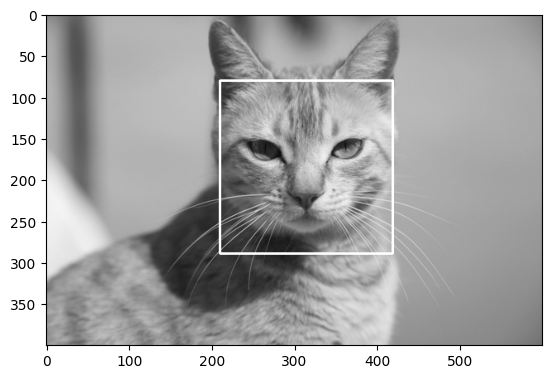

In [4]:
face_cascade_cat = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalcatface.xml')

def cascadeCat(img, gray) :
  faces = face_cascade_cat.detectMultiScale(gray, 1.1,4)
  for(x, y, w, h) in faces:
    cv.rectangle(img, (x, y), (x+w, y+h), (255,255,255),2)
  return img

img_cat1 = cv.imread('/content/drive/MyDrive/PCVK/12/mycat.jpg',0)
cat_rgb1 = cv.cvtColor(img_cat1, cv.COLOR_BGR2RGB)
gray_cat1 = cv.cvtColor(cat_rgb1, cv.COLOR_BGR2GRAY)

plt.imshow(cascadeCat(cat_rgb1, gray_cat1), cmap = 'gray')

plt.show()

# 4

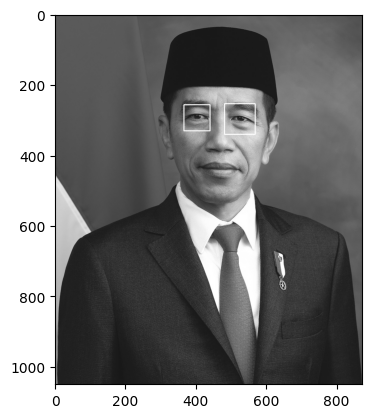

In [5]:
eye_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/12/haarcascade_eye.xml')

def cascadeEye(img, gray) :
  faces = eye_cascade.detectMultiScale(gray, 1.1,4)
  for(x, y, w, h) in faces:
    cv.rectangle(img, (x, y), (x+w, y+h), (255,255,255),2)
  return img

img_jokowi1 = cv.imread('/content/drive/MyDrive/PCVK/12/jokowi.jpg',0)
jokowi_rgb = cv.cvtColor(img_jokowi1, cv.COLOR_BGR2RGB)
gray_jokowi1 = cv.cvtColor(jokowi_rgb, cv.COLOR_BGR2GRAY)

plt.imshow(cascadeEye(jokowi_rgb, gray_jokowi1), cmap = 'gray')

plt.show()

# 5

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


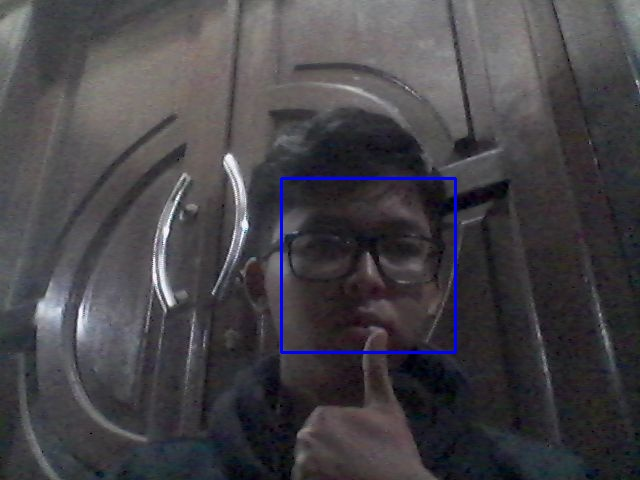

In [71]:
import PIL
import io
import html
import time
%matplotlib inline
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode

def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

def bbox_to_bytes(bbox_array):
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  bbox_PIL.save(iobuf, format='png')
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64decode(iobuf.getvalue()), 'utf-8')))
  
  return bbox_to_bytes

face_cascade2 = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/12/haarcascade_frontalface_alt.xml')

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality){
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  faces = face_cascade.detectMultiScale(gray)
  for(x,y,w,h) in faces:
    img = cv.rectangle(img,(x,y),(x+w,y+h),(255, 0, 0),2)

  cv.imwrite(filename, img)

  return filename

try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  display(Image(filename))
except Exception as err:
  print(str(err))

In [65]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [68]:
# # start streaming video from webcam
# video_stream()
# # label for video
# label_html = 'Capturing...'
# # initialze bounding box to empty
# bbox = ''
# count = 0 
# while True:
#     js_reply = video_frame(label_html, bbox)
#     if not js_reply:
#         break

#     # convert JS response to OpenCV Image
#     img = js_to_image(js_reply["img"])

#     # create transparent overlay for bounding box
#     bbox_array = np.zeros([480,640,4], dtype=np.uint8)

#     # grayscale image for face detection
#     gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

#     # get face region coordinates
#     faces = face_cascade.detectMultiScale(gray)
#     # get face bounding box for overlay
#     for (x,y,w,h) in faces:
#       bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

#     bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
#     # convert overlay of bbox into bytes
#     bbox_bytes = bbox_to_bytes(bbox_array)
#     # update bbox so next frame gets new overlay
#     bbox = bbox_bytes

# 6

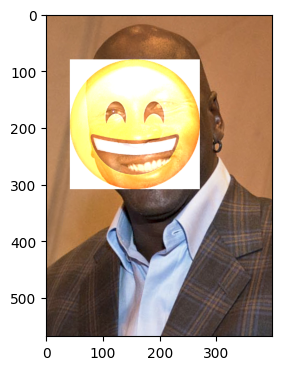

In [40]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/12/haarcascade_frontalface_alt.xml')
img_jordan = cv.imread('/content/drive/MyDrive/PCVK/12/mjordan.jpg')
smile = cv.imread('/content/drive/MyDrive/PCVK/12/smile.png', cv.IMREAD_UNCHANGED)

gray = cv.cvtColor(img_jordan, cv.COLOR_BGR2GRAY)
faces = cascade_wajah.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

for (x, y, w, h) in faces:
    smile_resized = cv.resize(smile, (w, h))
    img_jordan[y:y+h, x:x+w] = cv.addWeighted(img_jordan[y:y+h, x:x+w], 1, smile_resized[:, :, 0:3],1, 0)


plt.subplot(121), plt.imshow(cv.cvtColor(img_jordan, cv.COLOR_BGR2RGB))
plt.show()

# 7

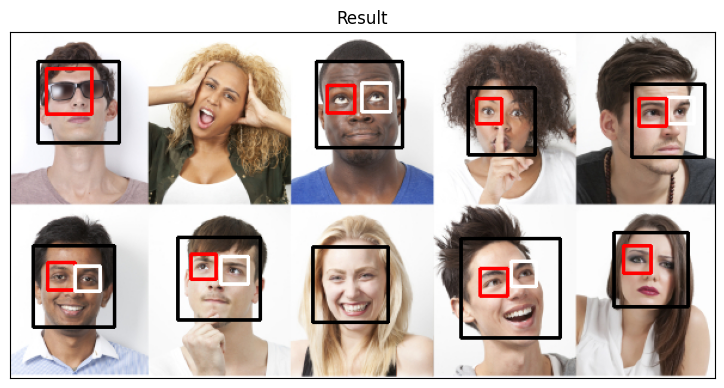

In [43]:
input_image = cv.imread('/content/drive/MyDrive/PCVK/12/people.jpg')
gray_input = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)

face_cascade3 = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/12/haarcascade_frontalface_alt.xml')
faces = face_cascade.detectMultiScale(gray_input, scaleFactor=1.1, minNeighbors=5)

for (x, y, w, h) in faces:
    cv.rectangle(input_image, (x, y), (x+w, y+h), (0, 0, 0), 2)

    roi_gray = gray_input[y:y+h, x:x+w]
    eye_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/12/haarcascade_eye.xml')
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5)

    for (ex, ey, ew, eh) in eyes:
        cv.rectangle(input_image, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (0, 0, 255), 2)

        if ex + ew/2 > w/2:
            cv.rectangle(input_image, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (255, 255, 255), 2)

plt.figure(figsize=(20, 20))
plt.subplot(122), plt.imshow(cv.cvtColor(input_image, cv.COLOR_BGR2RGB))
plt.title('Result'), plt.xticks([]), plt.yticks([])
plt.show()